# https://en.wikipedia.org/wiki/Mandelbrot_set

The mandelbrot iteration:

```python
N_MAX = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z * z + c
```
Point(x,y) belongs to the mandelbrot set if |z| < ``some_threshold``

In [1]:
import numpy as np

1. Contruct a grid of c = x + 1j*y values in range [-2,1]x[1.5,1.5]

In [2]:
W=480
H=320

x = np.linspace(-2, 1, H).reshape((1, H)) # One row
y = np.linspace(-1.5, 1.5, W).reshape((W,1)) # One column

# np.tile is used intead of meshgrid.
# The method np.tile takes an input array and a
# dimension list. This dimension list tells np.tile
# how many times should the input array be duplicated
# in the given dimension:
# (10,) - means duplicate the input array 10 times in the first dimension
# (1, 10) - means duplicate the input array 1 time in the first dimension
#           and 10 times in the second.

C = np.tile(x, (W, 1)) + 1j * np.tile(y, (1, H))

For each point do the mentioned iteration and form the 2-d boolean mask indicating which points are in the set

In [3]:
N_MAX = 100
some_threshold = 100

Z = np.zeros((W, H), dtype=complex)
M = np.full((W, H), True, dtype=bool)
for i in range(N_MAX):
    Z[M] = Z[M] * Z[M] + C[M]
    # Instead of checking the values against the treshold after the
    # iterations, cut the values that escapes to infinity, '
    # to avoid overflow
    M[np.abs(Z) > some_threshold] = False


Plot the image

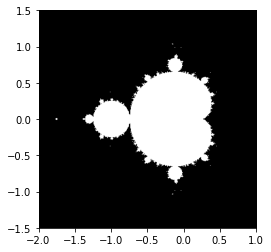

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(M, extent=[-2, 1, -1.5, 1.5])
plt.gray()

# Next line saves the image as mandelbrot.png
#plt.savefig('mandelbrot.png')